# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [17]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [20]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [21]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [22]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 536.5535
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 244.4414
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 194.0660
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 146.9807
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 106.0642
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 75.4324
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 56.2264
Epoch 8/100
240/240 [==============================] - 0s 2ms/step - loss: 45.6951
Epoch 9/100
240/240 [==============================] - 0s 2ms/step - loss: 40.4341
Epoch 10/100
240/240 [==============================] - 0s 2ms/step - loss: 38.6570
Epoch 11/100
240/240 [==============================] - 0s 2ms/step - loss: 37.4719
Epoch 12/100
240/240 [==============================] - 0s 2ms/step - loss: 36.6

### Predicting the results of the Test set

In [23]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 [==============================] - 0s 1ms/step
[[432.21 431.23]
 [463.23 460.01]
 [466.71 461.14]
 ...
 [473.96 473.26]
 [440.74 438.  ]
 [459.94 463.28]]


# **Confusion Matrix**

In [28]:
# Assuming y_test and y_pred are continuous values

# Convert to binary labels (0 or 1) based on a threshold (e.g., 0.5)
threshold = 1.0
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate confusion matrix and accuracy
cm = confusion_matrix(y_test_binary, y_pred_binary)
ac = accuracy_score(y_test_binary, y_pred_binary)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", ac)


Confusion Matrix:
[[1914]]
Accuracy: 1.0


In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred are your continuous target variable and predictions

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Standard Deviation of Residuals
residuals = y_test - y_pred
std_residuals = np.std(residuals)
print("Standard Deviation of Residuals:", std_residuals)


Mean Squared Error (MSE): 25.37846191232177
R-squared: 0.9132324191577633
Standard Deviation of Residuals: 23.839778873409742


# **Making a Single Prediction**

In [34]:
print(ann.predict([[33.8, 64.96, 1004.88, 49.37]]))

1/1 [==============================] - 0s 74ms/step
[[426.85]]


# **Training Set Visualisation**

240/240 [==============================] - 0s 1ms/step


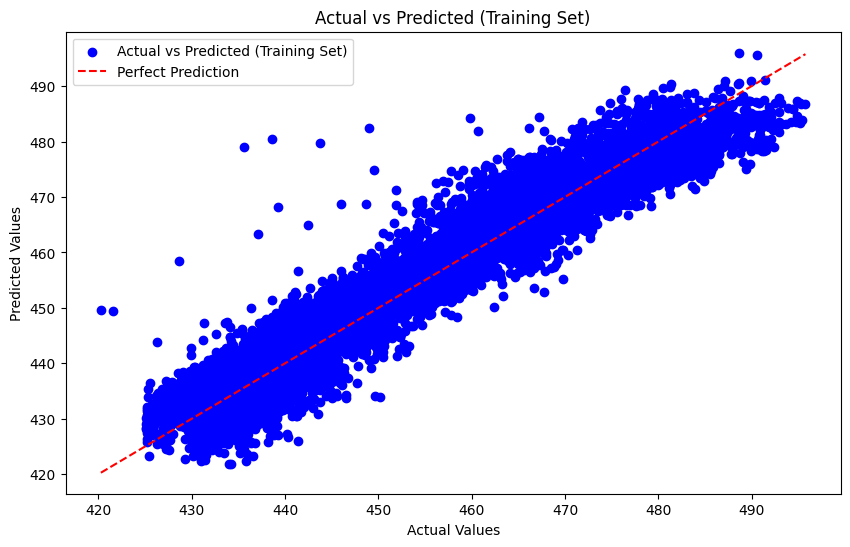

In [35]:
import matplotlib.pyplot as plt
y_train_pred = ann.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted (Training Set)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# **Test Set Visualisation**

60/60 [==============================] - 0s 1ms/step


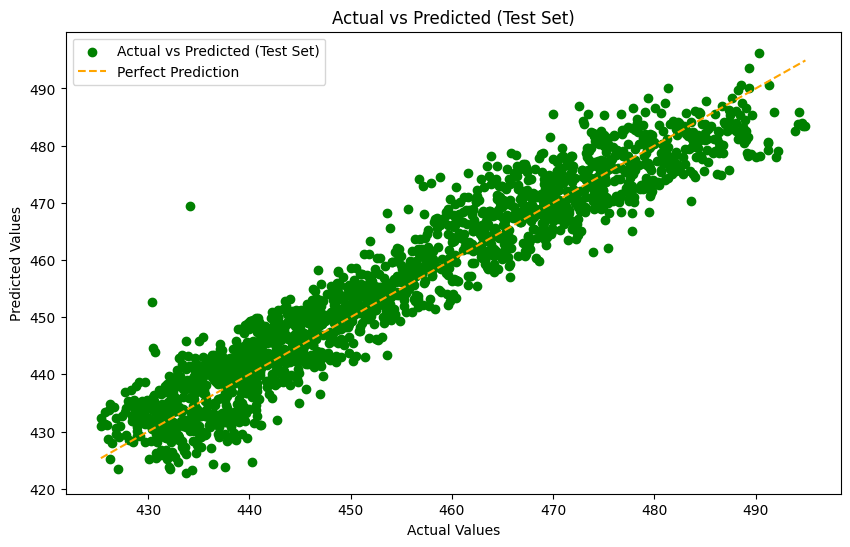

In [36]:
y_test_pred = ann.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs Predicted (Test Set)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', label='Perfect Prediction')
plt.title('Actual vs Predicted (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
